# Run Augmentations

In [1]:
import os
import torch
from torch.optim import lr_scheduler
import torch.nn as nn
import torchvision.transforms as transforms
import sys
sys.path.append('../')
from drive_dataset import DriveData_LMDB
from drive_dataset import AugmentDrivingTransform
from drive_dataset import DrivingDataToTensor
from torch.utils.data import DataLoader

import cv2
import matplotlib
import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

training_dir = '/home/ubuntu/datasets/Dataset_LMDB_Original/'

In [2]:
dataset = DriveData_LMDB(training_dir)

Load LMDB: /home/ubuntu/datasets/Dataset_LMDB_Original/


Steering angle: 0.01502072
Image type: uint8
Image shape: (66, 200, 3)
Image max: 185
Image min: 37
Image mean: 94.3919696969697


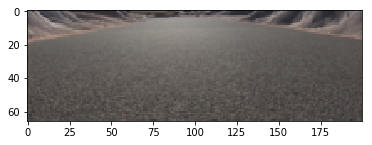

In [3]:
# Get Item from dataset
sample = dataset[0]
plt.imshow(sample['image'])
print('Steering angle:', sample['label'])
print('Image type:', sample['image'].dtype)
print('Image shape:', sample['image'].shape)
print('Image max:', np.max(sample['image']))
print('Image min:', np.min(sample['image']))
print('Image mean:', np.mean(sample['image']))

In [15]:
def random_brightness(image):    
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.1 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB).astype('uint8')

def convert_to_gray(img):
    # Get each channel
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    # To keep same number of channels add gray to each one.
    img_new = img.copy()
    img_new[:, :, 0] = gray
    img_new[:, :, 1] = gray
    img_new[:, :, 2] = gray
    return img_new.astype('uint8')

def convert_to_sepia(img):
    # Get each channel
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    img_new = img.copy()
    img_new[:, :, 0] = 0.393 * r + 0.769 * g + 0.189 * b
    img_new[:, :, 1] = 0.349 * r + 0.686 * g + 0.168 * b
    img_new[:, :, 2] = 0.272 * r + 0.534 * g + 0.131 * b
    return img_new.astype('uint8')

def color_swap(img):
    new_img = img.copy()
    list_chanels = [0, 1, 2]
    random.shuffle(list_chanels)
    new_img[:, : ,0] = img[:, :, list_chanels[0]]
    new_img[:, :, 1] = img[:, :, list_chanels[1]]
    new_img[:, :, 2] = img[:, :, list_chanels[2]]
    return new_img.astype('uint8')

def add_noise(img):
    row,col,ch = img.shape
    gauss = np.random.randn(row,col,ch)
    gauss = gauss.reshape(row,col,ch) / 30
    new_img = img + img * gauss
    return new_img.astype('uint8')

def random_shadow(image):
    """
    Generates and adds random shadow
    """
    # (x1, y1) and (x2, y2) forms a line
    # xm, ym gives all the locations of the image
    x1, y1 = image.shape[1] * np.random.rand(), 0
    x2, y2 = image.shape[1] * np.random.rand(), image.shape[0]
    xm, ym = np.mgrid[0:image.shape[0], 0:image.shape[1]]

    # mathematically speaking, we want to set 1 below the line and zero otherwise
    # Our coordinate is up side down.  So, the above the line: 
    # (ym-y1)/(xm-x1) > (y2-y1)/(x2-x1)
    # as x2 == x1 causes zero-division problem, we'll write it in the below form:
    # (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
    mask = np.zeros_like(image[:, :, 1])
    mask[np.where((ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0)] = 1

    # choose which side should have shadow and adjust saturation
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)

    # adjust Saturation in HLS(Hue, Light, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB).astype('uint8')

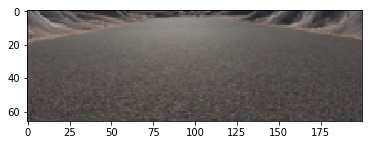

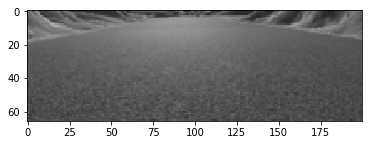

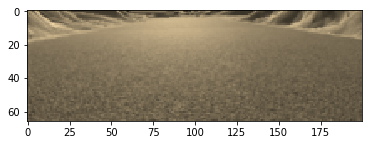

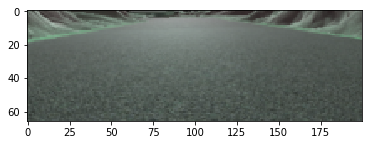

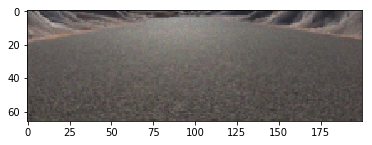

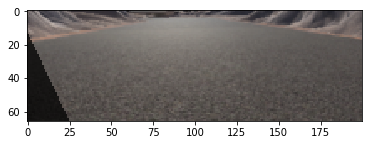

Steering angle: 0.01502072


In [16]:
# Get Item from dataset
plt.imshow(random_brightness(sample['image']))
plt.show()
plt.imshow(convert_to_gray(sample['image']))
plt.show()
plt.imshow(convert_to_sepia(sample['image']))
plt.show()
plt.imshow(color_swap(sample['image']))
plt.show()
plt.imshow(add_noise(sample['image']))
plt.show()
plt.imshow(random_shadow(sample['image']))
plt.show()
print('Steering angle:', sample['label'])